

![Airbnb Logo](https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Airbnb_Logo_B%C3%A9lo.svg/320px-Airbnb_Logo_B%C3%A9lo.svg.png)

# **AirBNB_Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Setting up Airbnb's color palette:**

In [2]:
airbnb_colors = ["#FF5A5F", "#00A699", "#767676", "#484848", "#FC642D"]
sns.set_palette(airbnb_colors)
sns.set(style ="whitegrid")
from matplotlib.colors import LinearSegmentedColormap
import random
cmap= LinearSegmentedColormap.from_list("airbnb_palette", airbnb_colors)
ex_airbnb = sns.color_palette(airbnb_colors, n_colors=15)


In [3]:
path = "Airbnb_Data.csv"

In [4]:
data = pd.read_csv(path)

# Key Columns

- **log_price:** Log-transformed price of the listings.
- **property_type:** Type of property (e.g., Apartment, House).
- **room_type:** Specifies whether it's the entire home, private room, etc..
- **accommodates:** Number of guests the property can accommodate.
- **bathrooms, bedrooms, beds:** Information about the property’s features.
- **cancellation_policy:** The type of cancellation policy.
- **city, neighbourhood:** Location details.
- **number_of_reviews, review_scores_rating:** Feedback information.
- **cleaning_fee, instant_bookable:** Boolean indicators for additional fees or booking policies.



In [5]:
data.head(29)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
5,12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,...,37.753164,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0
6,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,...,33.980454,-118.462821,Beach Town Studio and Parking!!!11h,NaN,15,97.0,https://a0.muscache.com/im/pictures/4c920c60-4...,90292,1.0,1.0
7,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,...,34.046737,-118.260439,"Near LA Live, Staple's. Starbucks inside. OWN ...",Downtown,9,93.0,https://a0.muscache.com/im/pictures/61bd05d5-c...,90015,1.0,1.0
8,180792,4.787492,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,...,37.781128,-122.501095,Cozy Garden Studio - Private Entry,Richmond District,159,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.0,1.0
9,5385260,3.583519,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,True,...,33.992563,-117.895997,No.7 Queen Size Cozy Room 舒适大床房,NaN,2,90.0,https://a0.muscache.com/im/pictures/8d2f08ce-b...,91748,1.0,1.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [7]:
data.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [8]:
print(f'The dataframe contains {data.shape[0]} rows & {data.shape[1]} columns')

data.columns

The dataframe contains 74111 rows & 29 columns


Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [9]:
data.describe(include=['object'])

,property_type,room_type,amenities,bed_type,cancellation_policy,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,name,neighbourhood,thumbnail_url,zipcode
count,74111,74111,74111,74111,74111,74111,74111,58247,73923,73923,55812,73923,74111,58284,74111,67239,65895,73145
unique,35,3,67122,5,5,6,73479,2554,2,2,80,3087,2,1371,73359,619,65883,769
top,Apartment,Entire home/apt,{},Real Bed,strict,NYC,"Hello, I've been running guest house for Korea...",2017-01-01,t,t,100%,2015-03-30,f,2017-04-30,Bunk bed in the Treat Street Clubhouse,Williamsburg,https://a0.muscache.com/im/pictures/70087089/b...,11211.0
freq,49003,41310,586,72028,32374,32349,8,293,73697,49748,43254,246,54660,1344,8,2862,3,1368


# Preparing the data

In [10]:
data.isna().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
data_nbrs = data[["latitude", "longitude", "neighbourhood"]]
X_test_nbrs = data_nbrs.loc[data_nbrs["neighbourhood"].isna()].drop( "neighbourhood", axis=1)


In [13]:
data_nbrs_not_na = data_nbrs.loc[data_nbrs["neighbourhood"].notna()]
data_nbrs_not_na

,latitude,longitude,neighbourhood
0,40.696524,-73.991617,Brooklyn Heights
1,40.766115,-73.989040,Hell's Kitchen
2,40.808110,-73.943756,Harlem
3,37.772004,-122.431619,Lower Haight
4,38.925627,-77.034596,Columbia Heights
...,...,...,...
74106,40.709025,-73.939405,Williamsburg
74107,33.871549,-118.396053,Hermosa Beach
74108,40.706749,-73.942377,Williamsburg
74109,40.738535,-74.000157,West Village


In [14]:
X_train_nbrs, y_train_nbrs = (
    data_nbrs_not_na.drop(["neighbourhood"], axis=1),
    data_nbrs_not_na["neighbourhood"])

In [15]:
from sklearn.neighbors import KNeighborsClassifier


nbrs = KNeighborsClassifier(n_neighbors=2)
nbrs.fit(X_train_nbrs, y_train_nbrs)
nbrs_pred = nbrs.predict(X_test_nbrs)
nbrs_pred = pd.Series(nbrs_pred, index=X_test_nbrs.index)
nbrs_pred

6        Marina Del Rey
9           West Covina
14           Long Beach
26            Hollywood
28             Downtown
              ...      
74098         Hollywood
74099         Hollywood
74101      Santa Monica
74104        Gold Coast
74105    West Hollywood
Length: 6872, dtype: object

In [16]:
data["neighbourhood"] = data["neighbourhood"].fillna(value=nbrs_pred)


In [17]:
data['host_since'] = data['host_since'].fillna(data['first_review'])


In [18]:
from datetime import datetime
data['host_active_years'] = datetime.now().year - pd.to_datetime(data['host_since']).dt.year
data.drop('host_since', axis=1, inplace=True)

In [19]:
data_corr = data[['beds', 'bedrooms', 'bathrooms', 'accommodates' ]]
corr_matrix = data_corr.corr()
print(corr_matrix)

                  beds  bedrooms  bathrooms  accommodates
beds          1.000000  0.709454   0.525603      0.810792
bedrooms      0.709454  1.000000   0.589974      0.709265
bathrooms     0.525603  0.589974   1.000000      0.505657
accommodates  0.810792  0.709265   0.505657      1.000000


In [20]:
data['beds'] = data.groupby(['accommodates'])['beds'].transform(lambda x: x.fillna(x.median()))
data['bedrooms'] = data.groupby(['beds','accommodates'])['bedrooms'].transform(lambda x: x.fillna(x.median()))
data['bathrooms'] = data.groupby(['beds', 'bedrooms'])['bathrooms'].transform(lambda x: x.fillna(x.median()))

In [21]:
#median_rating_when_no_reviews = data[data['number_of_reviews'] == 0]['review_scores_rating'].median()
#data.loc[data['number_of_reviews'] == 0, 'review_scores_rating'].fillna(median_rating_when_no_reviews, inplace=True)

median_rating = data['review_scores_rating'].median()
data['review_scores_rating'].fillna(median_rating, inplace=True)

In [22]:

data['host_has_profile_pic'].fillna('f', inplace=True)
data['host_identity_verified'].fillna('f', inplace=True)

In [23]:

columns_bool = ['instant_bookable', 'host_has_profile_pic', 'host_identity_verified']

data[columns_bool] = data[columns_bool].apply(lambda col: col.map({"t": True, "f": False}))


In [24]:
clean_list = lambda clean_list: [
    item.strip('"') for item in clean_list.strip("{}").split(",")
]
data["amenities"] = data["amenities"].apply(clean_list)

**Drop columns that are not necessary or have a high percentage of missing values**

In [25]:
drop_columns = ['id','zipcode', 'thumbnail_url', 'last_review', 'first_review', 'host_response_rate']
data.drop(drop_columns, axis=1, inplace=True)
data.reset_index(drop=True, inplace=True)

In [26]:
data.isna().sum()

log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
host_has_profile_pic      0
host_identity_verified    0
instant_bookable          0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
beds                      0
host_active_years         0
dtype: int64

We no longer have any null values in our dataset

# Finding outliers


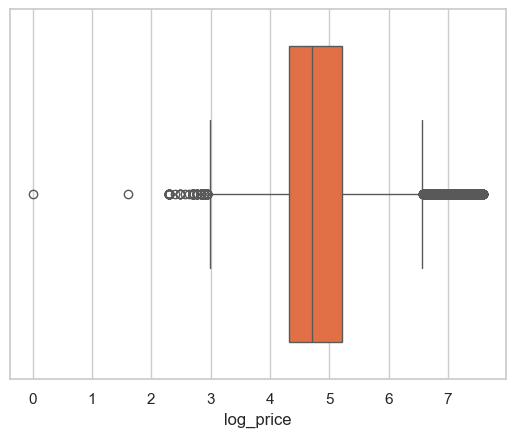

In [27]:
sns.boxplot(x=data['log_price'], color= airbnb_colors[4])
plt.show()

In [28]:
Q1 = data['log_price'].quantile(0.25)
Q3 = data['log_price'].quantile(0.75)
IQR = Q3 - Q1

outliers_log_price = data[(data['log_price'] < Q1 - 1.5*IQR) | (data['log_price'] > Q3 + 1.5*IQR)]

print(f"Number of outliers in log_price: {len(outliers_log_price)}")


Number of outliers in log_price: 1531


In [29]:
log_price_col = 'log_price'

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data[log_price_col].quantile(0.25)
Q3 = data[log_price_col].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the rows with outliers
outliers = data[(data[log_price_col] < lower_bound) | (data[log_price_col] > upper_bound)]

print("The lower bound bound is",lower_bound)

# Display the outliers
outliers.sort_values(by='log_price', ascending=True)

The lower bound bound is 2.9631865462232887


,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,instant_bookable,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds,host_active_years
11628,0.000000,Condominium,Shared room,"[TV, Wireless Internet, Air conditioning, Kitc...",1,1.0,Real Bed,strict,True,NYC,...,True,40.838054,-73.858665,Esteem's Place,Parkchester,3,87.0,1.0,1.0,7
3896,1.609438,Apartment,Entire home/apt,"[Wireless Internet, Air conditioning, Kitchen,...",2,1.0,Real Bed,flexible,True,NYC,...,True,40.782207,-73.973961,Upper West Side Studio Steps from Central Park,Upper West Side,1,100.0,0.0,1.0,11
56609,2.302585,Apartment,Private room,"[TV, Cable TV, Internet, Kitchen, Free parking...",2,1.0,Real Bed,flexible,True,Chicago,...,True,41.811745,-87.623370,Comfortable Bedroom in Bronzeville (QUEEN BED),Bronzeville,0,96.0,1.0,1.0,8
19795,2.302585,Apartment,Private room,"[TV, Washer, Dryer, Internet, Wireless Interne...",2,1.0,Real Bed,flexible,False,SF,...,False,37.782833,-122.390453,Private bed/bath in lux building,South Beach,1,100.0,1.0,1.0,10
66804,2.302585,Apartment,Entire home/apt,"[TV, Internet, Wireless Internet, Air conditio...",5,2.0,Real Bed,strict,True,LA,...,False,34.056837,-118.351029,BEAUTY LA,Mid-Wilshire,4,100.0,2.0,3.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42654,7.600402,Apartment,Entire home/apt,"[Internet, Wireless Internet, Air conditioning...",2,1.0,Real Bed,moderate,True,NYC,...,False,40.728233,-73.989335,Huge Loft with Private Entrance,East Village,20,85.0,1.0,1.0,11
60041,7.600402,Apartment,Entire home/apt,"[TV, Internet, Wireless Internet, Air conditio...",6,1.0,Real Bed,strict,False,DC,...,False,38.947020,-77.066699,Cozy apartment in Van Ness on metro,Cleveland Park,0,96.0,1.0,2.0,8
19200,7.600402,House,Entire home/apt,"[TV, Wireless Internet, Air conditioning, Pool...",10,4.5,Real Bed,strict,True,LA,...,False,34.101991,-118.418381,"Beverly Hills Estate Pool, Tennis & Jetliner V...",Bel Air/Beverly Crest,0,96.0,4.0,4.0,10
55426,7.600402,Townhouse,Entire home/apt,"[TV, Wireless Internet, Air conditioning, Kitc...",7,3.5,Real Bed,strict,True,NYC,...,True,40.733003,-73.994126,Royal Manor!!!,Greenwich Village,1,80.0,4.0,4.0,7


In [30]:
from scipy.stats import percentileofscore

value = upper_bound
quantile = percentileofscore(data['log_price'], value)
print(f"The quantile for the value {value} in log_price is: {quantile}%, which means that {100 - quantile}% of the rows are above the upper threshold of {value}.")

The quantile for the value 6.574657392391346 in log_price is: 98.14902320808976%, which means that 1.8509767919102416% of the rows are above the upper threshold of 6.574657392391346.


In [31]:
data=data[data['log_price']!=0]

In [32]:
data.to_csv('desktop/processed_data.csv', index=False)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74068 entries, 0 to 74068
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74068 non-null  float64
 1   property_type           74068 non-null  object 
 2   room_type               74068 non-null  object 
 3   amenities               74068 non-null  object 
 4   accommodates            74068 non-null  int64  
 5   bathrooms               74068 non-null  float64
 6   bed_type                74068 non-null  object 
 7   cancellation_policy     74068 non-null  object 
 8   cleaning_fee            74068 non-null  bool   
 9   city                    74068 non-null  object 
 10  description             74068 non-null  object 
 11  host_has_profile_pic    74068 non-null  bool   
 12  host_identity_verified  74068 non-null  bool   
 13  instant_bookable        74068 non-null  bool   
 14  latitude                74068 non-null  flo

# Exploratory Data Analysis

**Univariate analysis**

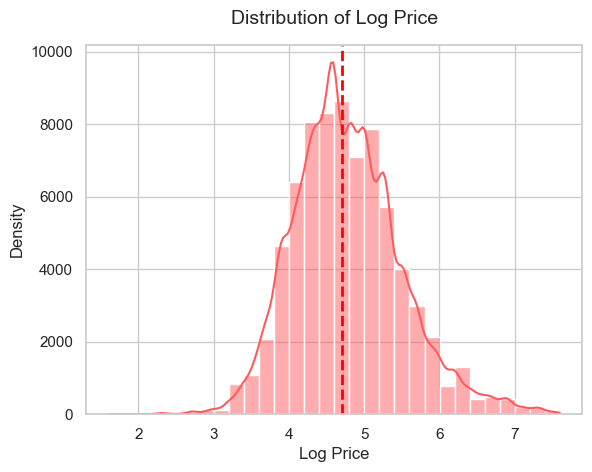

In [34]:
sns.histplot(data['log_price'],color= airbnb_colors[0], bins=30,kde=True)
plt.xlabel('Log Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of Log Price',fontsize=14, pad=15)

median_log_price = data['log_price'].median()
plt.axvline(median_log_price, color='red', linestyle='dashed', linewidth=2)
plt.show()

In [35]:
data['log_price'].describe()

count    74068.000000
mean         4.782059
std          0.717209
min          1.609438
25%          4.317488
50%          4.709530
75%          5.220356
max          7.600402
Name: log_price, dtype: float64

The histogram shows a reasonably symmetric distribution.
The mean log price is approximately 4.78, which corresponds to an average price of around 120 doll (when converted back from the log scale).
The minimum log price is about 1.61 (approximately 5 doll), while the maximum log price is 7.60 (approximately  2000 doll), indicating a wide range in listing prices. 
This analysis suggests that while most listings are clustered around an average price, there are a few high-priced outliers. This could reflect luxury properties or listings in premium locations.

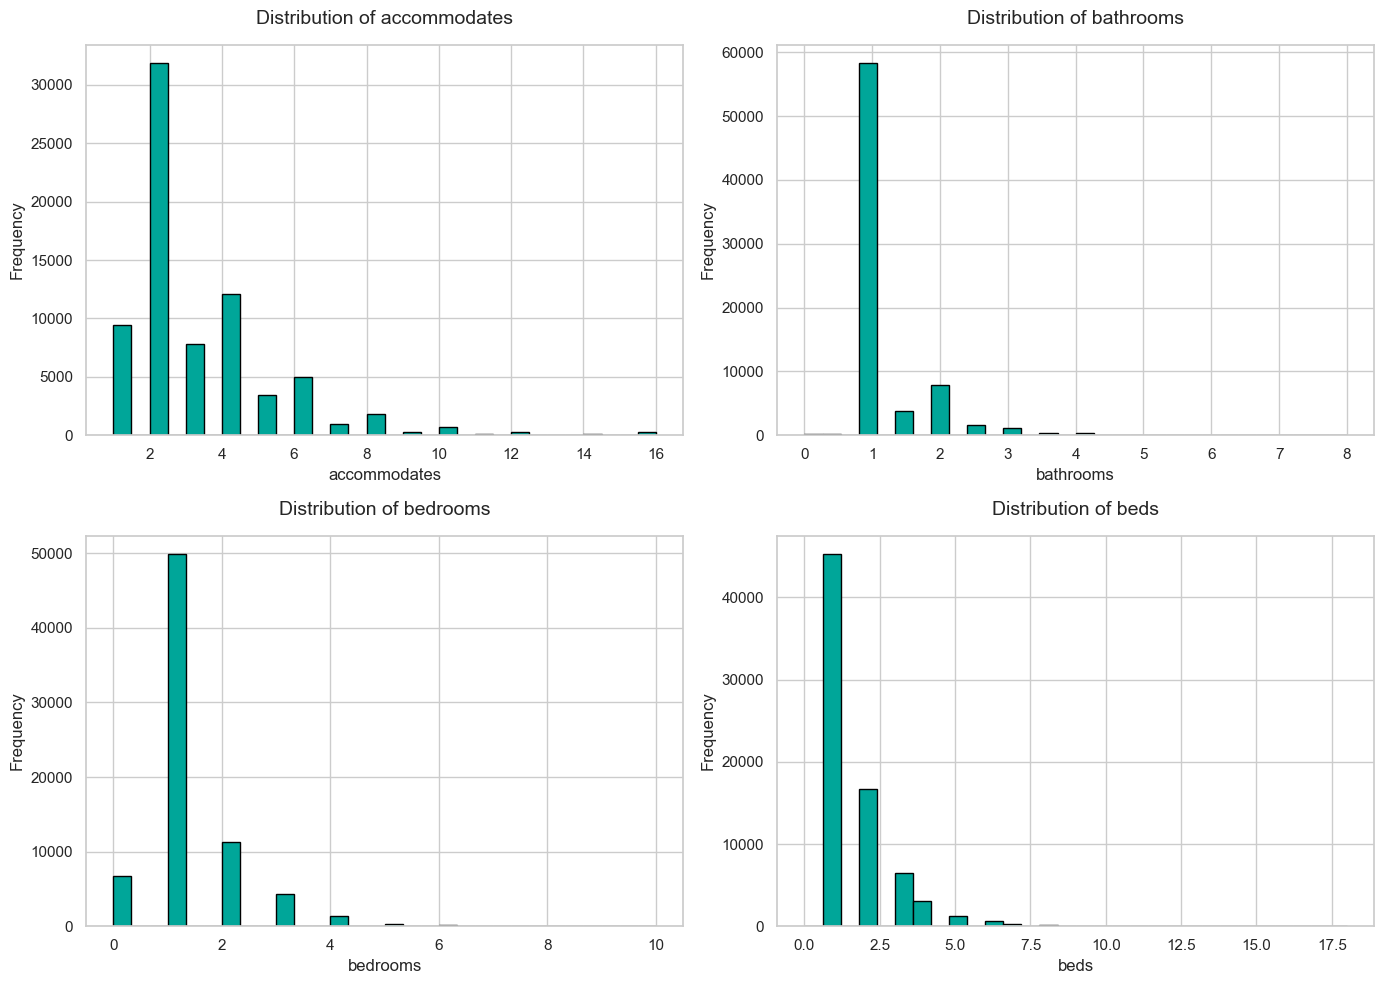

In [36]:
numerical_vars = ['accommodates', 'bathrooms', 'bedrooms', 'beds']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

for i, var in enumerate(numerical_vars):
    ax = axes[i//2, i%2]
    ax.hist(data[var], bins=30, color= airbnb_colors[1], edgecolor='black')
    ax.set_title(f'Distribution of {var}', fontsize=14, pad =15)
    ax.set_xlabel(var, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()


In [37]:
data[numerical_vars].describe()

,accommodates,bathrooms,bedrooms,beds
count,74068.000000,74068.000000,74068.000000,74068.000000
mean,3.155546,1.234784,1.265580,1.710145
std,2.153878,0.581557,0.851804,1.253981
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000
50%,2.000000,1.000000,1.000000,1.000000
75%,4.000000,1.000000,1.000000,2.000000
max,16.000000,8.000000,10.000000,18.000000


These graphs show that most listings are smaller apartments or homes with 1-2 bedrooms and bathrooms, accommodating 2-4 guests. Higher values (e.g., larger properties with multiple beds or bedrooms) are relatively rare but exist in the dataset.

In [38]:
city_counts = data['city'].value_counts()
city_percentage = data['city'].value_counts(normalize=True) * 100
city_stats = pd.DataFrame({
    'Count': city_counts,
    'Percentage': city_percentage
})
city_stats

,Count,Percentage
city,,
NYC,32309,43.620727
LA,22450,30.309985
SF,6434,8.686612
DC,5688,7.679430
Chicago,3719,5.021062
Boston,3468,4.682184


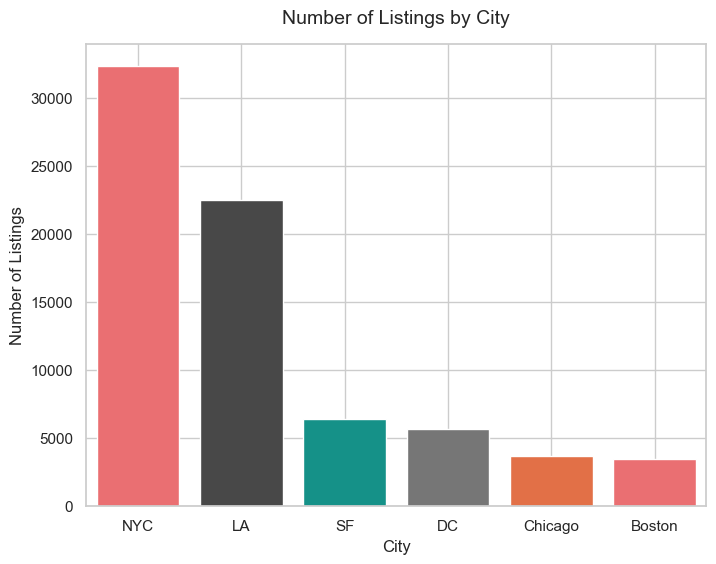

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data,x='city',hue='city',  palette=ex_airbnb[:6], order=data['city'].value_counts().index)
plt.title('Number of Listings by City', fontsize=14, pad =15)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.grid(True)
plt.show()

The bar chart illustrates the distribution of Airbnb listings across several major cities. New York City leads with the highest number of listings, which is not surprising given its status as a prominent tourist hub. Los Angeles follows closely behind, reflecting its importance as both a cultural and entertainment center. San Francisco and Washington D.C. also feature a significant number of listings, although much fewer compared to NYC and LA.This distribution highlights how larger metropolitan areas dominate the Airbnb market, while smaller cities still maintain a notable but more limited presence.

In [40]:
avg_price = data.groupby(['city'])['log_price'].mean()
avg_price.sort_values(ascending=False)

city
SF         5.170014
DC         4.986798
Boston     4.884035
LA         4.720492
NYC        4.719237
Chicago    4.620079
Name: log_price, dtype: float64

In terms of average log prices, San Francisco stands out with the highest price (5.17), while Los Angeles and New York show similar prices around 4.72. Chicago has the lowest average price at 4.62.

/var/folders/9v/8mh63wsx31zbptv01gg18rz80000gp/T/ipykernel_49973/3128134831.py:3: UserWarning: 
The palette list has fewer values (10) than needed (35) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=data, y='property_type',hue = 'property_type', order=data['property_type'].value_counts().index[0:10], palette=ex_airbnb[:10])


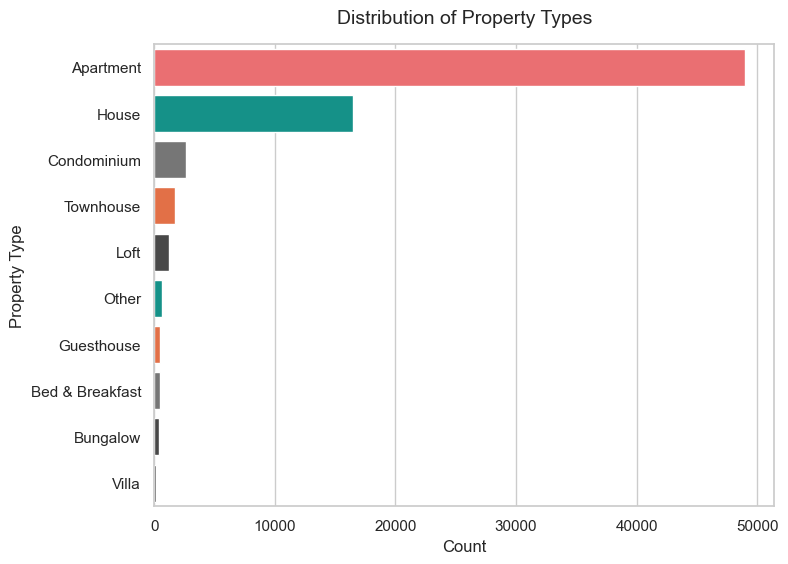

In [41]:
plt.figure(figsize=(8, 6))

sns.countplot(data=data, y='property_type',hue = 'property_type', order=data['property_type'].value_counts().index[0:10], palette=ex_airbnb[:10])
plt.title('Distribution of Property Types', fontsize=14, pad =15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Property Type', fontsize=12)
plt.show()

In [42]:
property_counts = data['property_type'].value_counts()
property_counts


property_type
Apartment             48968
House                 16510
Condominium            2655
Townhouse              1691
Loft                   1242
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    71
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Train                     2
Cave                      2
Casa particular           1
Parking Space             1
Lighthouse                1
Island                    1
Name: 

The dataset contains a wide variety of property types. Apartments are by far the most common property type, with 48968 listings, houses come in second, with 16510 listings. Rare and unique property types like Castles, Treehouses, and Boats have very few listings but offer niche experiences.This distribution shows that standard property types dominate the market.

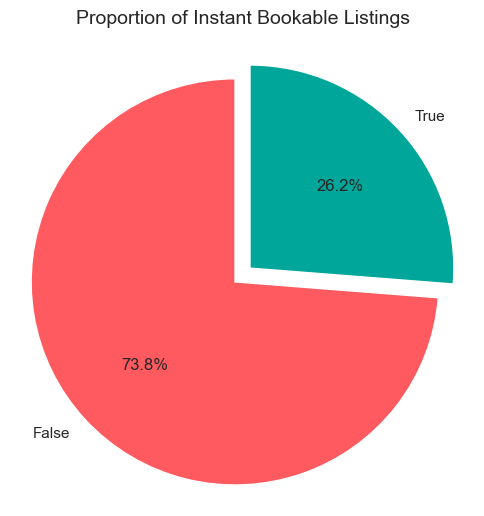

In [43]:
instant_bookable_counts = data['instant_bookable'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(instant_bookable_counts, labels=['False', 'True'], autopct='%1.1f%%', startangle=90, colors = airbnb_colors, explode=[0, 0.1])
plt.title('Proportion of Instant Bookable Listings', fontsize=14, pad =15)
plt.axis('equal')
plt.show()


This indicates that a majority of listings (about 74%) require host approval before booking, while around 26% of listings can be booked instantly.



In [44]:
amenities_count ={}
for i in data["amenities"]:
    for j in i:
        if j in amenities_count:
            amenities_count[j] +=1
        else:
            amenities_count[j]=1

In [45]:
amenities_sort = sorted(amenities_count.items(), key = lambda item: amenities_count[item[0]], reverse =True)
amenities_sort = amenities_sort[0:15]
amenities_sort

[('Wireless Internet', 71228),
 ('Kitchen', 67490),
 ('Heating', 67037),
 ('Essentials', 63973),
 ('Smoke detector', 61698),
 ('Air conditioning', 55180),
 ('TV', 52429),
 ('Shampoo', 49445),
 ('Hangers', 49153),
 ('Carbon monoxide detector', 47172),
 ('Internet', 44627),
 ('Laptop friendly workspace', 43687),
 ('Hair dryer', 43314),
 ('Washer', 43153),
 ('Dryer', 42695)]

In [46]:
names = [name for name, value in amenities_sort]
names

['Wireless Internet',
 'Kitchen',
 'Heating',
 'Essentials',
 'Smoke detector',
 'Air conditioning',
 'TV',
 'Shampoo',
 'Hangers',
 'Carbon monoxide detector',
 'Internet',
 'Laptop friendly workspace',
 'Hair dryer',
 'Washer',
 'Dryer']

In [47]:
values = [value for name, value in amenities_sort]
values

[71228,
 67490,
 67037,
 63973,
 61698,
 55180,
 52429,
 49445,
 49153,
 47172,
 44627,
 43687,
 43314,
 43153,
 42695]

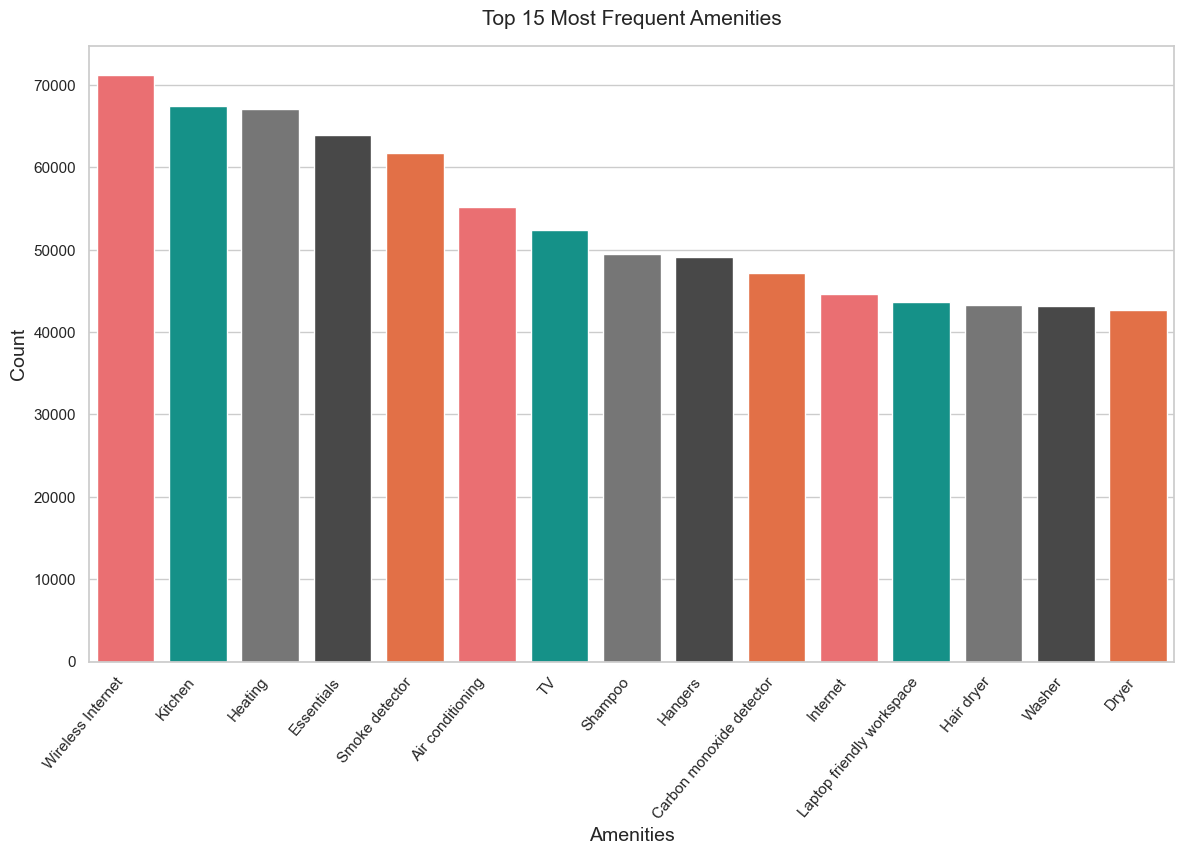

In [48]:
plt.figure(figsize =(14,8))
ax = sns.barplot(x=names, y=values, hue = names, palette =ex_airbnb[:15])
plt.title('Top 15 Most Frequent Amenities', fontsize = 15,  pad = 15)
ax.set_xticks(range(len(names)))
ax.set_xticklabels(names, rotation = 50,  ha='right')
plt.xlabel('Amenities', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

The graph showing the top 15 most common amenities highlights the priorities and expectations of guests, as well as the standards hosts aim to meet. Wireless Internet is the most frequent amenity, emphasizing the importance of connectivity for both tourists and business travelers. Kitchen ranks second, reflecting the need for cooking facilities, especially during longer stays. Amenities like Heating, Air Conditioning, and Essentials underline the commitment to providing comfort.

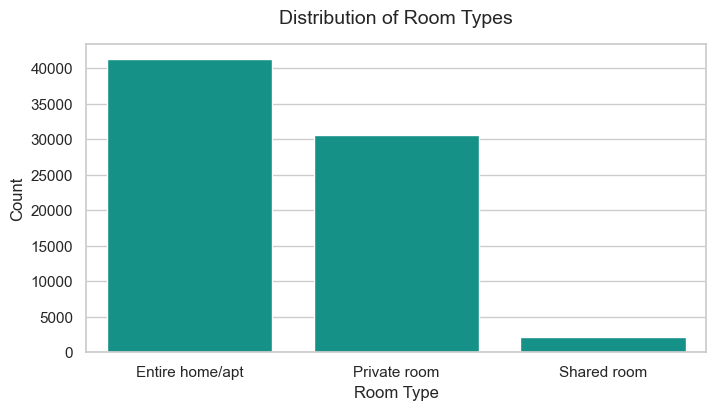

In [49]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='room_type', color= ex_airbnb[11], order=data['room_type'].value_counts().index)
plt.title('Distribution of Room Types', fontsize = 14,  pad = 15)
plt.xlabel('Room Type', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

The graph illustrates the distribution of room types in the dataset. It shows that the majority of listings are Entire home/apt, indicating that most Airbnb users prefer renting whole properties rather than just rooms. 

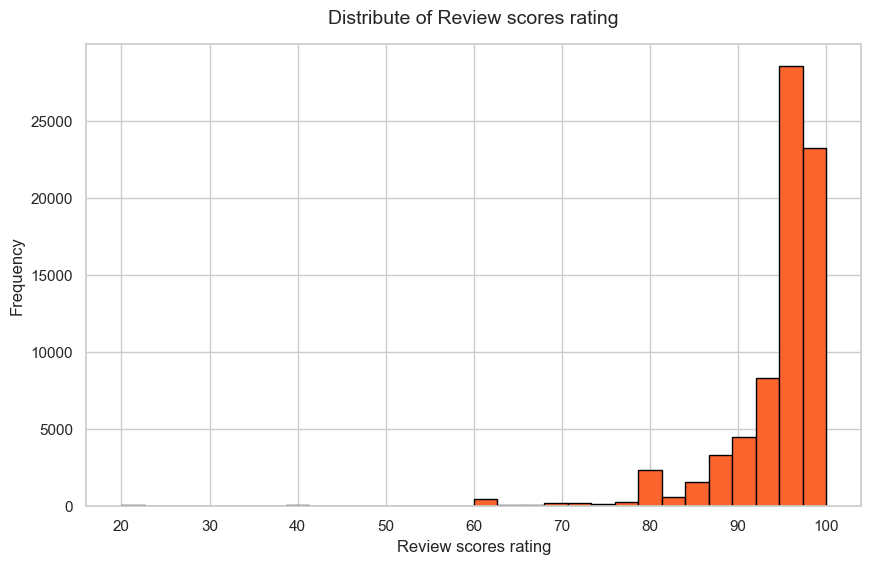

In [50]:
plt.figure(figsize=(10, 6)) 
plt.hist(data['review_scores_rating'], bins=30, color=airbnb_colors[4], edgecolor='black') 
plt.title('Distribute of Review scores rating', fontsize = 14,  pad = 15)
plt.xlabel('Review scores rating', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.show()

The graph shows the distribution of review scores. It is evident that the vast majority of ratings are concentrated in the high range, between 90 and 100, indicating that the overwhelming majority of guests rate their experience very positively.

In [51]:
neighbourhood_avg_scores = data.groupby('neighbourhood')['review_scores_rating'].mean().sort_values()
lowest_neighbourhoods = neighbourhood_avg_scores.head(10)

lowest_neighbourhoods.sort_values()

neighbourhood
Meiers Corners    79.750000
Graniteville      80.000000
Dupont Park       82.666667
Benning Ridge     83.000000
Twining           84.250000
Concord           85.000000
North Park        85.142857
Somerville        85.333333
West Town         86.000000
Pullman           87.500000
Name: review_scores_rating, dtype: float64

These neighborhoods tend to have lower average review scores compared to others, which could be due to a variety of factors, such as location quality, amenities, or property conditions.

In [52]:
highest_neighbourhoods = neighbourhood_avg_scores.tail(10)
highest_neighbourhoods.sort_values(ascending=False)

neighbourhood
Observatory Circle       100.0
Chevy Chase, MD          100.0
Rolling Hills            100.0
Brighton Park            100.0
Silver Spring, MD        100.0
Westchester Village      100.0
Massachusetts Heights    100.0
Oakwood                  100.0
Morris Park               99.2
Annadale                  99.0
Name: review_scores_rating, dtype: float64

In [53]:
neighbourhood_review_counts = data.groupby('neighbourhood')['number_of_reviews'].sum()
neighbourhood_stat = pd.DataFrame({
    'number_of_reviews': neighbourhood_review_counts,
    'average_review_score': neighbourhood_avg_scores
})

neighbourhood_by_reviews = neighbourhood_stat.sort_values(by='number_of_reviews', ascending=False)
neighbourhood_by_reviews.head(10)

,number_of_reviews,average_review_score
neighbourhood,,
Venice,52132,94.841108
Williamsburg,52102,94.670045
Bedford-Stuyvesant,47747,93.525173
Hollywood,43531,93.733535
Mid-Wilshire,36911,94.283231
Hell's Kitchen,34584,93.349500
Harlem,28497,93.959213
Mission District,24285,95.566327
Bushwick,24269,93.667083


These neighborhoods have garnered the most reviews, indicating their popularity among Airbnb guests. Despite the high number of reviews, their average scores remain strong.

# Bivariate analysis

In [54]:
data['neighbourhood'].value_counts().head(15)

neighbourhood
Williamsburg          2861
Bedford-Stuyvesant    2165
Mid-Wilshire          1783
Hollywood             1655
Bushwick              1601
Upper West Side       1394
Harlem                1373
Venice                1372
Hell's Kitchen        1299
Upper East Side       1203
Crown Heights         1074
West Hollywood         900
Astoria                897
Lower East Side        828
East Village           812
Name: count, dtype: int64

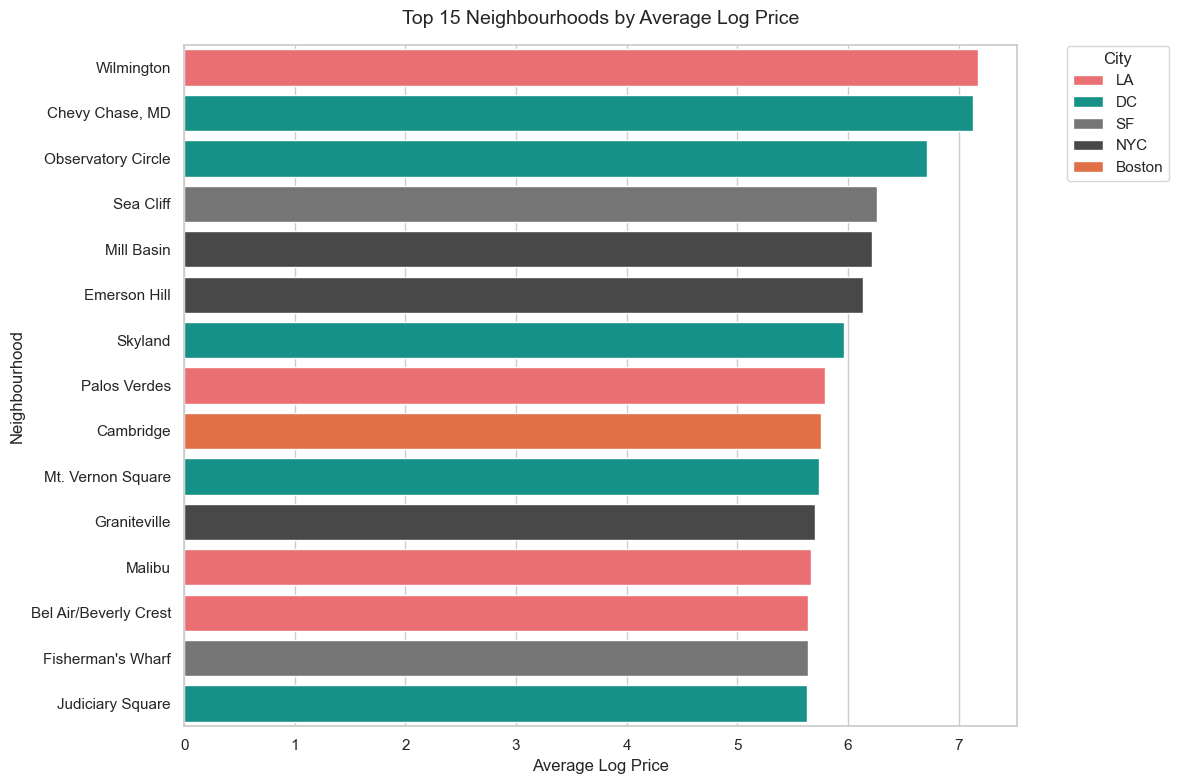

In [55]:
top_15_neigh = data.groupby(['neighbourhood', 'city'])['log_price'].mean().nlargest(15).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(y=top_15_neigh['neighbourhood'], 
            x=top_15_neigh['log_price'], 
            hue=top_15_neigh['city'], 
            palette=airbnb_colors)

plt.title('Top 15 Neighbourhoods by Average Log Price', fontsize=14, pad =15)
plt.xlabel('Average Log Price', fontsize=12)
plt.ylabel('Neighbourhood',fontsize=12)

plt.legend(title='City', bbox_to_anchor=(1.05, 1.01), loc='upper left')

plt.tight_layout()
plt.show()



The chart displays the top 15 neighborhoods by average log price, categorized by different cities. Each bar represents the average log price of a neighborhood, with the colors indicating the respective city.
Wilmington (LA) and Chevy Chase, MD (DC) have the highest average log prices, with both nearing a log price of around 6.5.
Observatory Circle (DC) and Sea Cliff (SF) follow closely behind with high average prices.
Neighborhoods in LA and DC are among the most expensive, followed by those in San Francisco and New York. This suggests a concentration of high-value properties in certain cities.

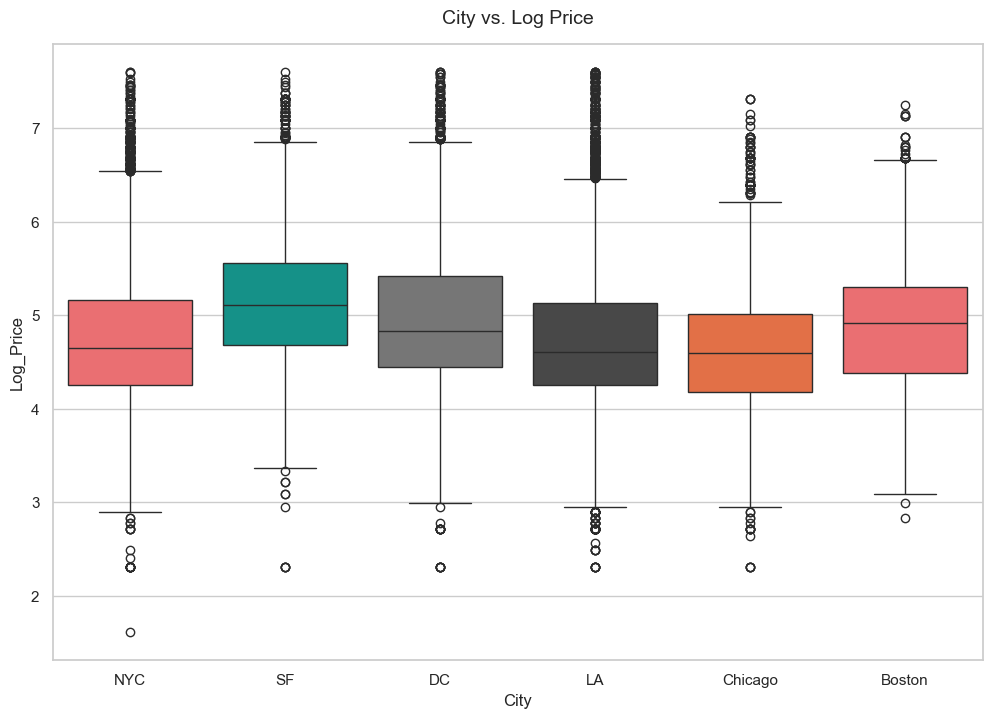

In [56]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data, x="city",y="log_price",hue= 'city', palette=ex_airbnb[:6] )
plt.title("City vs. Log Price", fontsize=14, pad =15)
plt.xlabel('City', fontsize=12)
plt.ylabel('Log_Price', fontsize=12)
plt.show()


The chart highlights price variations across cities, with San Francisco and Washington DC standing out as the cities with the highest property prices.

**Test ANOVA**

In [97]:
import scipy.stats as stats
grouped_data = data[['log_price', 'city']]
cities = grouped_data['city'].unique()  
city_groups = [grouped_data[grouped_data['city'] == city]['log_price'] for city in cities]

In [98]:
f_stat, p_value = stats.f_oneway(*city_groups)

print("F-statistic: ", f_stat)
print("p-value: ", p_value)

F-statistic:  629.4639157299317
p-value:  0.0


The result indicates a significant difference in property prices across cities.
- An F-statistic of 629.46 suggests there is substantial variation in property prices between cities.
- A p-value of 0.0 (much smaller than 0.05) means we reject the null hypothesis, confirming a statistically significant difference in property prices between cities.

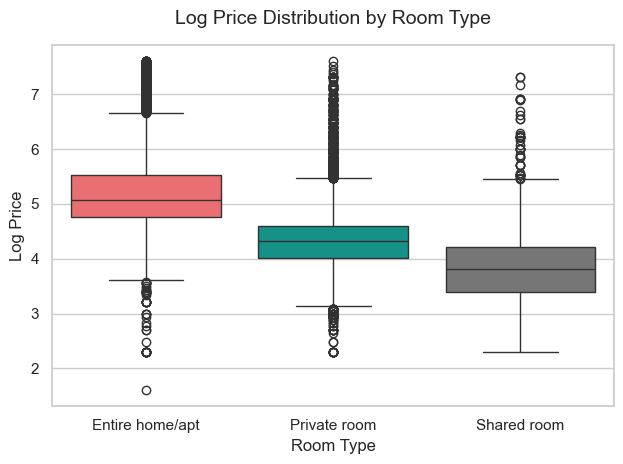

In [57]:
sns.boxplot(x='room_type', y='log_price', hue='room_type', data=data, palette=airbnb_colors[:3], legend=False)
plt.title('Log Price Distribution by Room Type', fontsize=14, pad =15)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Log Price', fontsize=12)
plt.tight_layout()
plt.show()

Entire home/apartment listings have higher prices compared to private rooms or shared rooms, reflecting the additional space and privacy provided.

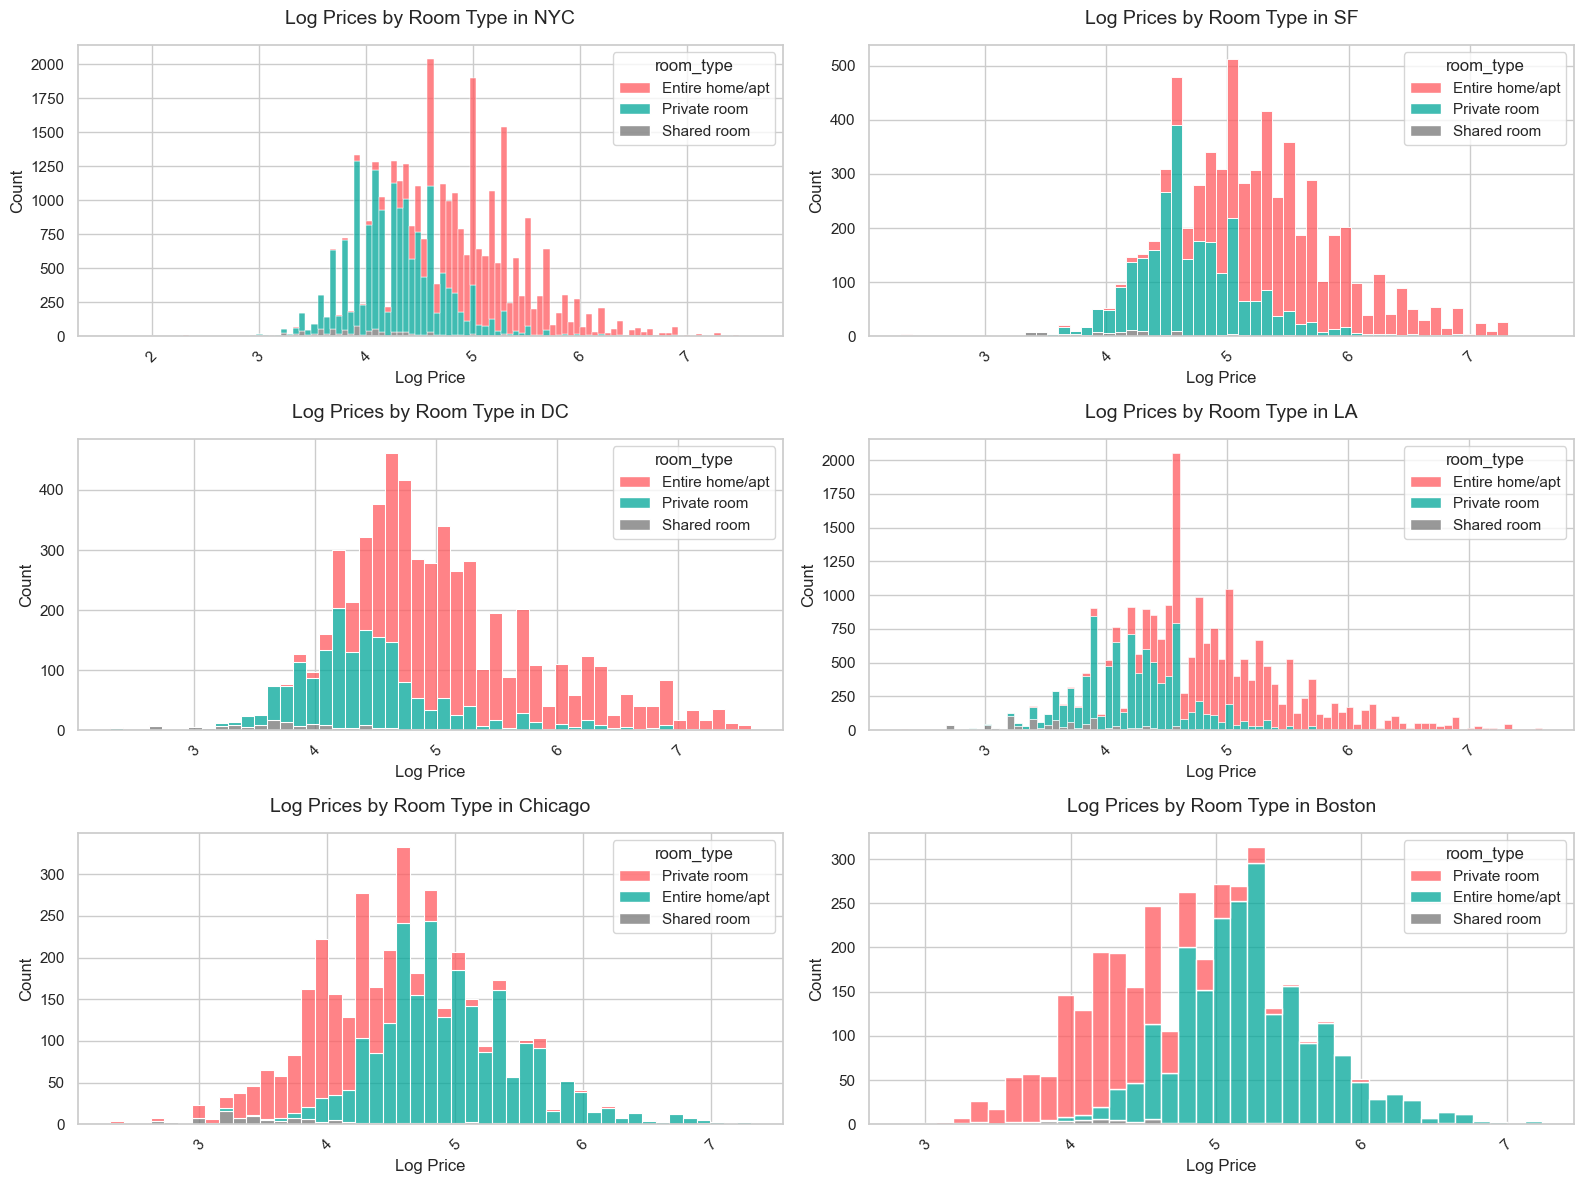

In [58]:
cities = data['city'].unique()
n_rows = len(cities) // 2 + len(cities) % 2 

fig, axes = plt.subplots(n_rows, 2, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for i, city in enumerate(cities):
    city_data = data[data['city'] == city]
    sns.histplot(data=city_data, x='log_price', hue='room_type', multiple='stack',palette=airbnb_colors[0:3], kde=False, ax=axes[i])
    axes[i].set_title(f'Log Prices by Room Type in {city}', fontsize=14, pad =15)
    axes[i].set_xlabel('Log Price',fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Entire homes/apartments consistently have the highest prices in all cities, while private rooms exhibit a wide range of prices that are generally lower. Shared rooms, as expected, have the lowest prices and are less common in some cities. Larger cities like New York and San Francisco display a broader price range, especially for entire homes, reflecting a more diverse rental market. 

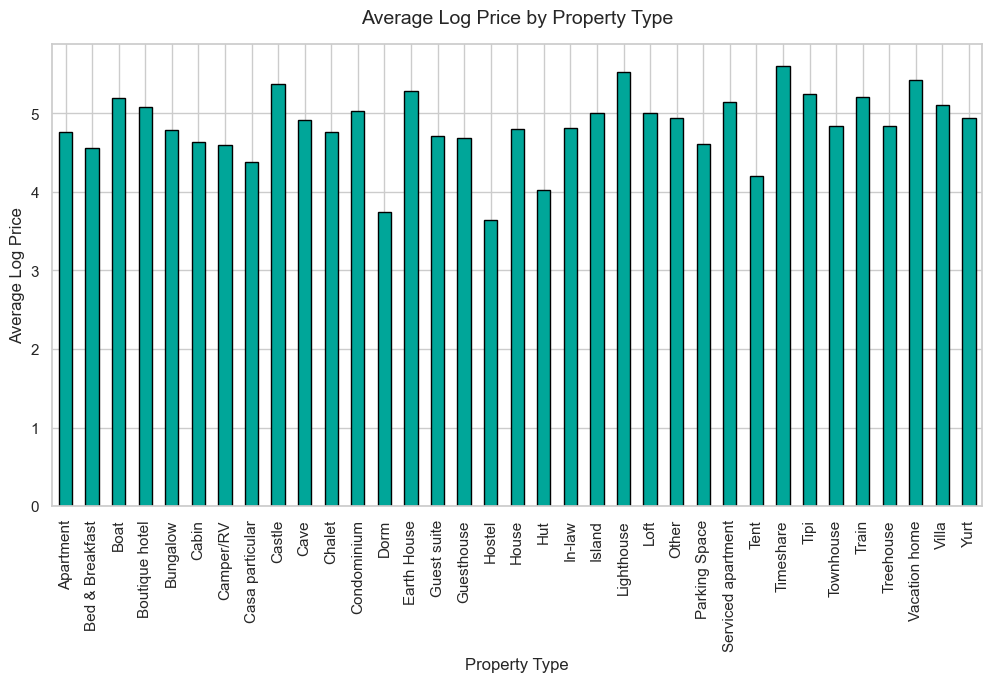

property_type
Timeshare             5.602600
Lighthouse            5.521461
Vacation home         5.420951
Castle                5.368424
Earth House           5.285391
Tipi                  5.246118
Train                 5.204399
Boat                  5.200865
Serviced apartment    5.147467
Villa                 5.112427
Boutique hotel        5.083352
Condominium           5.028160
Island                5.010635
Loft                  5.007242
Other                 4.946367
Yurt                  4.944360
Cave                  4.909373
Treehouse             4.845520
Townhouse             4.833297
In-law                4.816649
House                 4.797147
Bungalow              4.783268
Chalet                4.764325
Apartment             4.758781
Guest suite           4.717513
Guesthouse            4.685184
Cabin                 4.637318
Parking Space         4.605170
Camper/RV             4.602238
Bed & Breakfast       4.556068
Casa particular       4.382027
Tent                  4.1

In [59]:
average_log = data.groupby('property_type')['log_price'].mean()

plt.figure(figsize=(12, 6))
average_log.plot(kind='bar', color= airbnb_colors[1], edgecolor='black')
plt.title('Average Log Price by Property Type', fontsize=14, pad =15)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Average Log Price', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

average_log.sort_values(ascending=False)


Unique and luxury properties such as Timeshare, Lighthouses, Vacation homes, and Castles have the highest average log prices (above 5.36), indicating premium listings.
Standard properties such as Condominiums, Lofts, and Apartments fall within a log price range of 4.75 to 5.0, representing the bulk of the market.
Simpler properties, including Hostels, Dorms, and Huts, are the least expensive, with average log prices below 4.0.

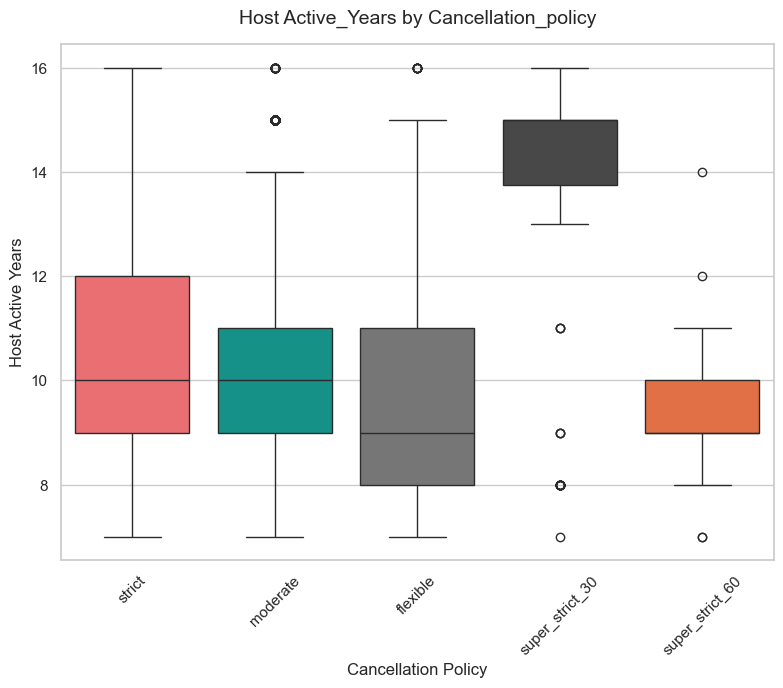

cancellation_policy
super_strict_30    13.321429
strict             10.133927
moderate           10.060034
flexible            9.563804
super_strict_60     9.411765
Name: host_active_years, dtype: float64

In [60]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(data=data, x='cancellation_policy', y='host_active_years', hue= 'cancellation_policy', palette= airbnb_colors, legend=False)
plt.tight_layout()
plt.title('Host Active_Years by Cancellation_policy', fontsize=14, pad =15)
plt.xlabel('Cancellation Policy', fontsize=12)
plt.ylabel('Host Active Years', fontsize=12)
plt.xticks(rotation=45)
plt.show()

average_active_years = data.groupby('cancellation_policy')['host_active_years'].mean()
average_active_years.sort_values(ascending=False)

The chart reveals a clear difference in host experience based on their chosen cancellation policy. Hosts with stricter policies, such as Super Strict 30, tend to have more experience on the platform, with an average of over 13 years of activity. It’s likely that these more experienced hosts choose strict cancellation policies to protect themselves from last-minute cancellations, feeling confident in their established reputation.

In contrast, hosts with Flexible cancellation policies typically have fewer years of experience, averaging around 9.5 years. Newer hosts might offer more flexible policies to attract more bookings and compete for guests’ attention.

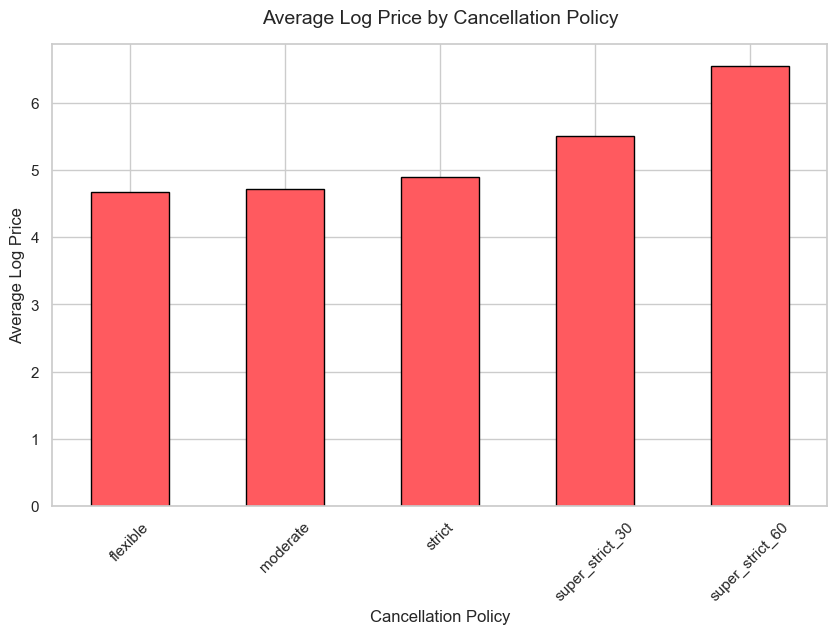

cancellation_policy
super_strict_60    6.541007
super_strict_30    5.500849
strict             4.887066
moderate           4.721119
flexible           4.677839
Name: log_price, dtype: float64

In [61]:
avg_log_price_per_policy = data.groupby('cancellation_policy')['log_price'].mean()


plt.figure(figsize=(10, 6))
avg_log_price_per_policy.plot(kind='bar', edgecolor='black', color=airbnb_colors[0])
plt.title('Average Log Price by Cancellation Policy', fontsize=14, pad = 15)
plt.xlabel('Cancellation Policy', fontsize=12)
plt.ylabel('Average Log Price', fontsize=12)
plt.xticks(rotation=45)
plt.show()
avg_log_price_per_policy.sort_values(ascending=False)


The graph shows that stricter cancellation policies are generally associated with higher prices. Properties with super_strict_60 and super_strict_30 policies have the highest average log prices, indicating that they are typically more expensive listings. In contrast, properties with flexible and moderate policies tend to have lower average prices. This suggests that hosts with high-end properties may choose stricter policies to protect against cancellations, while more affordable listings offer flexible policies to attract a wider range of guests.

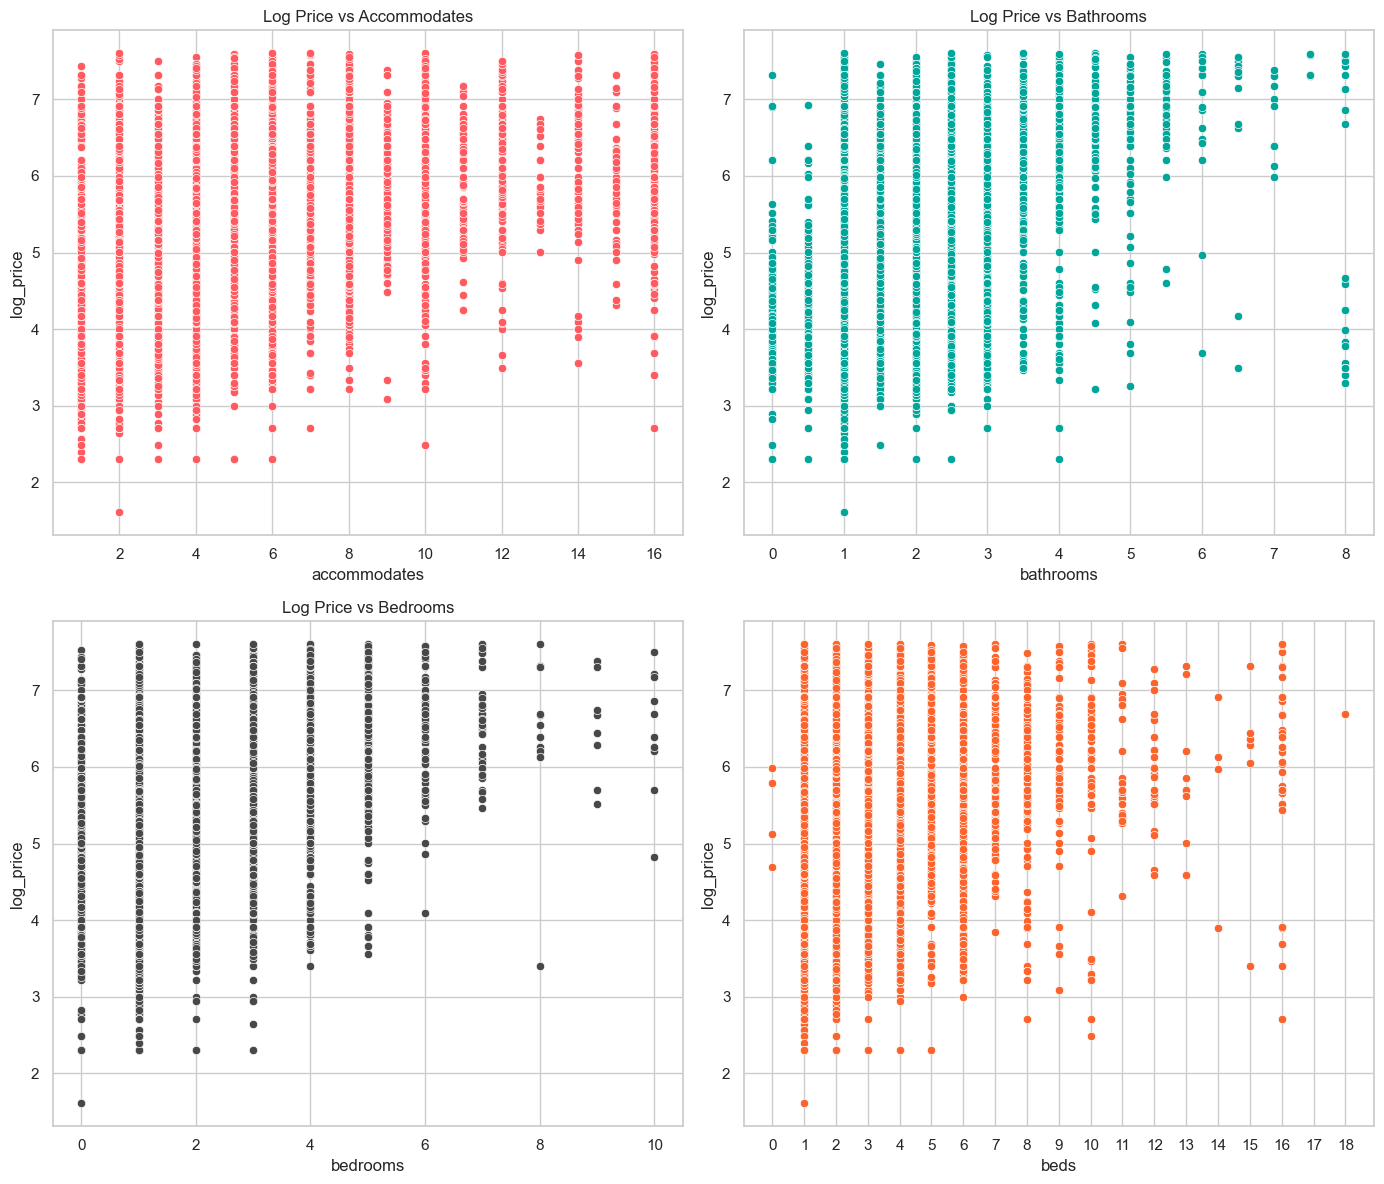

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
sns.scatterplot(ax=axes[0, 0], data=data, x='accommodates', y='log_price', color=airbnb_colors[0])
axes[0, 0].set_title('Log Price vs Accommodates')

sns.scatterplot(ax=axes[0, 1], data=data, x='bathrooms', y='log_price',color=airbnb_colors[1])
axes[0, 1].set_title('Log Price vs Bathrooms')

sns.scatterplot(ax=axes[1, 0], data=data, x='bedrooms', y='log_price', color=airbnb_colors[3])
axes[1, 0].set_title('Log Price vs Bedrooms')

sns.scatterplot(ax=axes[1, 1], data=data, x='beds', y='log_price', color=airbnb_colors[4])
axes[1, 1].set_xticks(np.arange(min(data['beds']), max(data['beds'])+1, 1))

plt.tight_layout()
plt.show()

The variables accommodates, beds, and bedrooms seem to be strong predictors of log_price, with beds showing a particularly clear relationship.

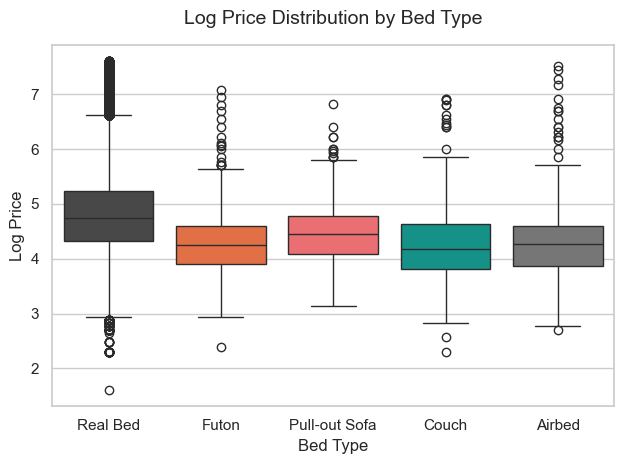

In [63]:
sns.boxplot(x='bed_type', y='log_price', hue='bed_type', data=data, palette=ex_airbnb[8:13], legend=False)
plt.title('Log Price Distribution by Bed Type', fontsize=14, pad =15)
plt.xlabel('Bed Type', fontsize=12)
plt.ylabel('Log Price', fontsize=12)
plt.tight_layout()
plt.show()

Properties with a real bed show a broader range of prices, with a higher median price compared to other bed types. This suggests that properties with real beds are often priced higher, likely because they offer better comfort and are more desirable for guests. Properties offering less conventional or less comfortable bed types like futons or pull-out sofas generally have lower prices.

In [64]:
data['bed_type'].value_counts()

bed_type
Real Bed         71988
Futon              751
Pull-out Sofa      585
Airbed             477
Couch              267
Name: count, dtype: int64

As expected, "Real Bed" is by far the most common bed type, while alternative bed types like futons, pull-out sofas, airbeds, and couches are much less frequent. This distribution likely explains the higher variability in prices for real beds compared to other bed types. ​

In [65]:
has_pic_avg = data.groupby('host_has_profile_pic')['log_price'].mean().sort_values()
has_pic_avg

host_has_profile_pic
True     4.781732
False    4.846977
Name: log_price, dtype: float64

The difference in average log prices between hosts with and without profile pictures is minimal. This suggests that whether or not a host has a profile picture does not significantly impact the listing price.

In [66]:
has_pic_scores = data.groupby('host_has_profile_pic')['review_scores_rating'].mean().sort_values()
has_pic_scores

host_has_profile_pic
False    94.336022
True     94.503528
Name: review_scores_rating, dtype: float64

The difference is extremely small, indicating that whether or not a host has a profile picture does not significantly affect the review scores either.

In [67]:
has_pic_scores = data.groupby('host_identity_verified')['log_price'].mean().sort_values()
has_pic_scores

host_identity_verified
False    4.757059
True     4.794281
Name: log_price, dtype: float64

The difference in prices between verified and non-verified hosts is minimal

## Multivariate analysis

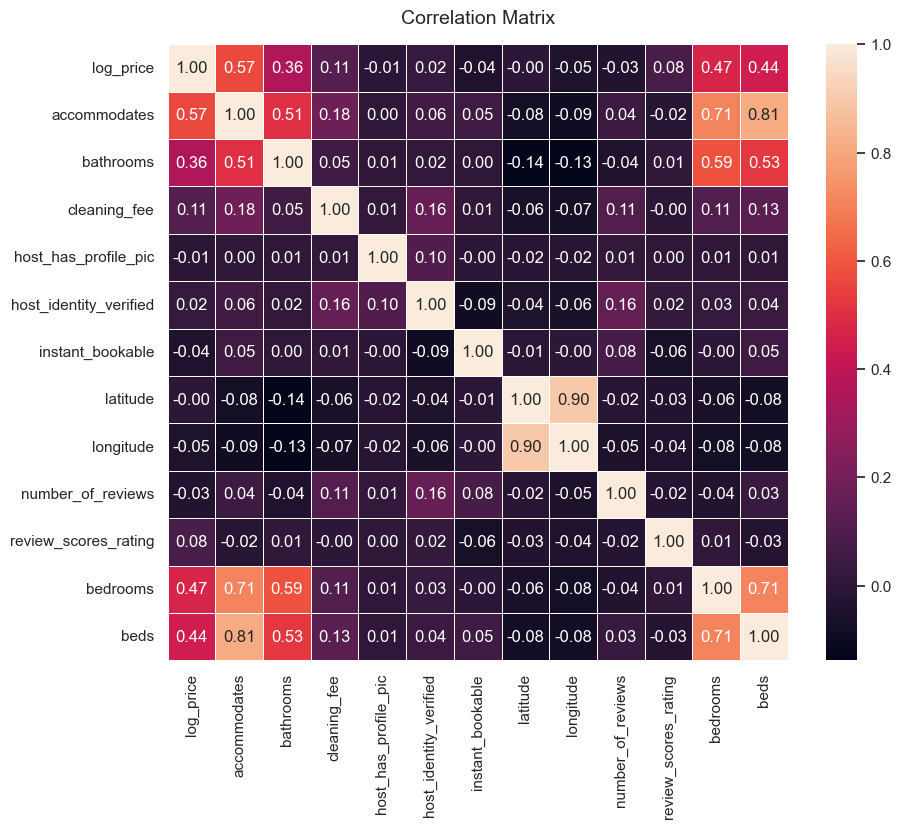

In [68]:
numeric_and_bool_df = data.select_dtypes(include=['float64', 'int64', 'bool'])

correlation_matrix = numeric_and_bool_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix',fontsize=14, pad = 15)
plt.show()

Accommodates has the strongest correlation with log_price (0.57), indicating that the more guests a property can accommodate, the higher the price.

Bedrooms (0.47) and beds (0.44) are also positively correlated with price, meaning that properties with more rooms and beds tend to be more expensive.

There’s only a weak correlation between log_price and review_scores_rating (0.08), suggesting that guest ratings don’t significantly affect pricing.

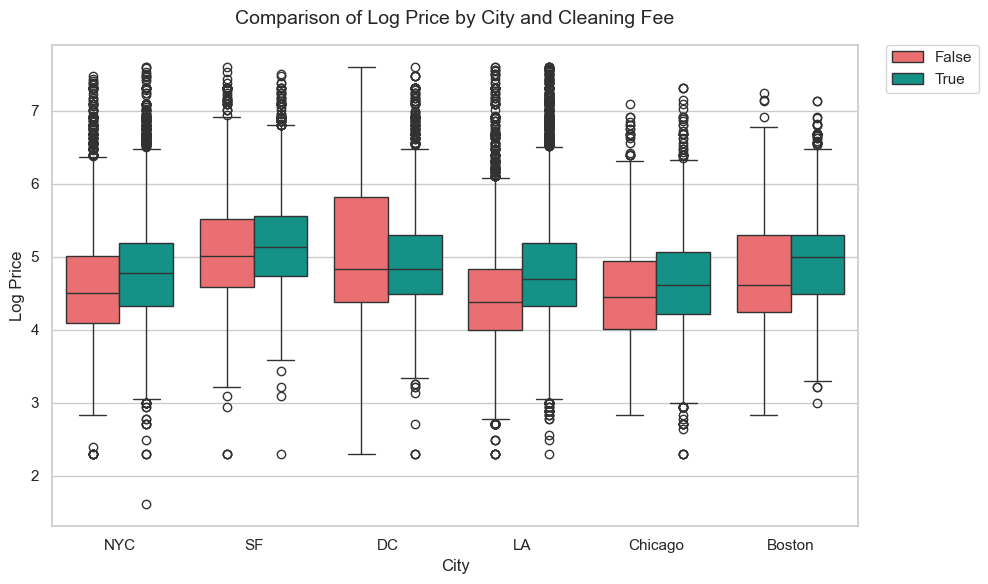

In [69]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='city', y='log_price', hue='cleaning_fee', data=data,palette=ex_airbnb[:2])
plt.title('Comparison of Log Price by City and Cleaning Fee', fontsize=14, pad = 15)
plt.xlabel('City', fontsize=12)
plt.ylabel('Log Price', fontsize=12)
#plt.xticks(rotation=90)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()


In most cities, properties with a cleaning fee tend to have higher prices compared to those without.The price differences between properties with and without cleaning fees vary across cities, with some cities showing a more significant gap.

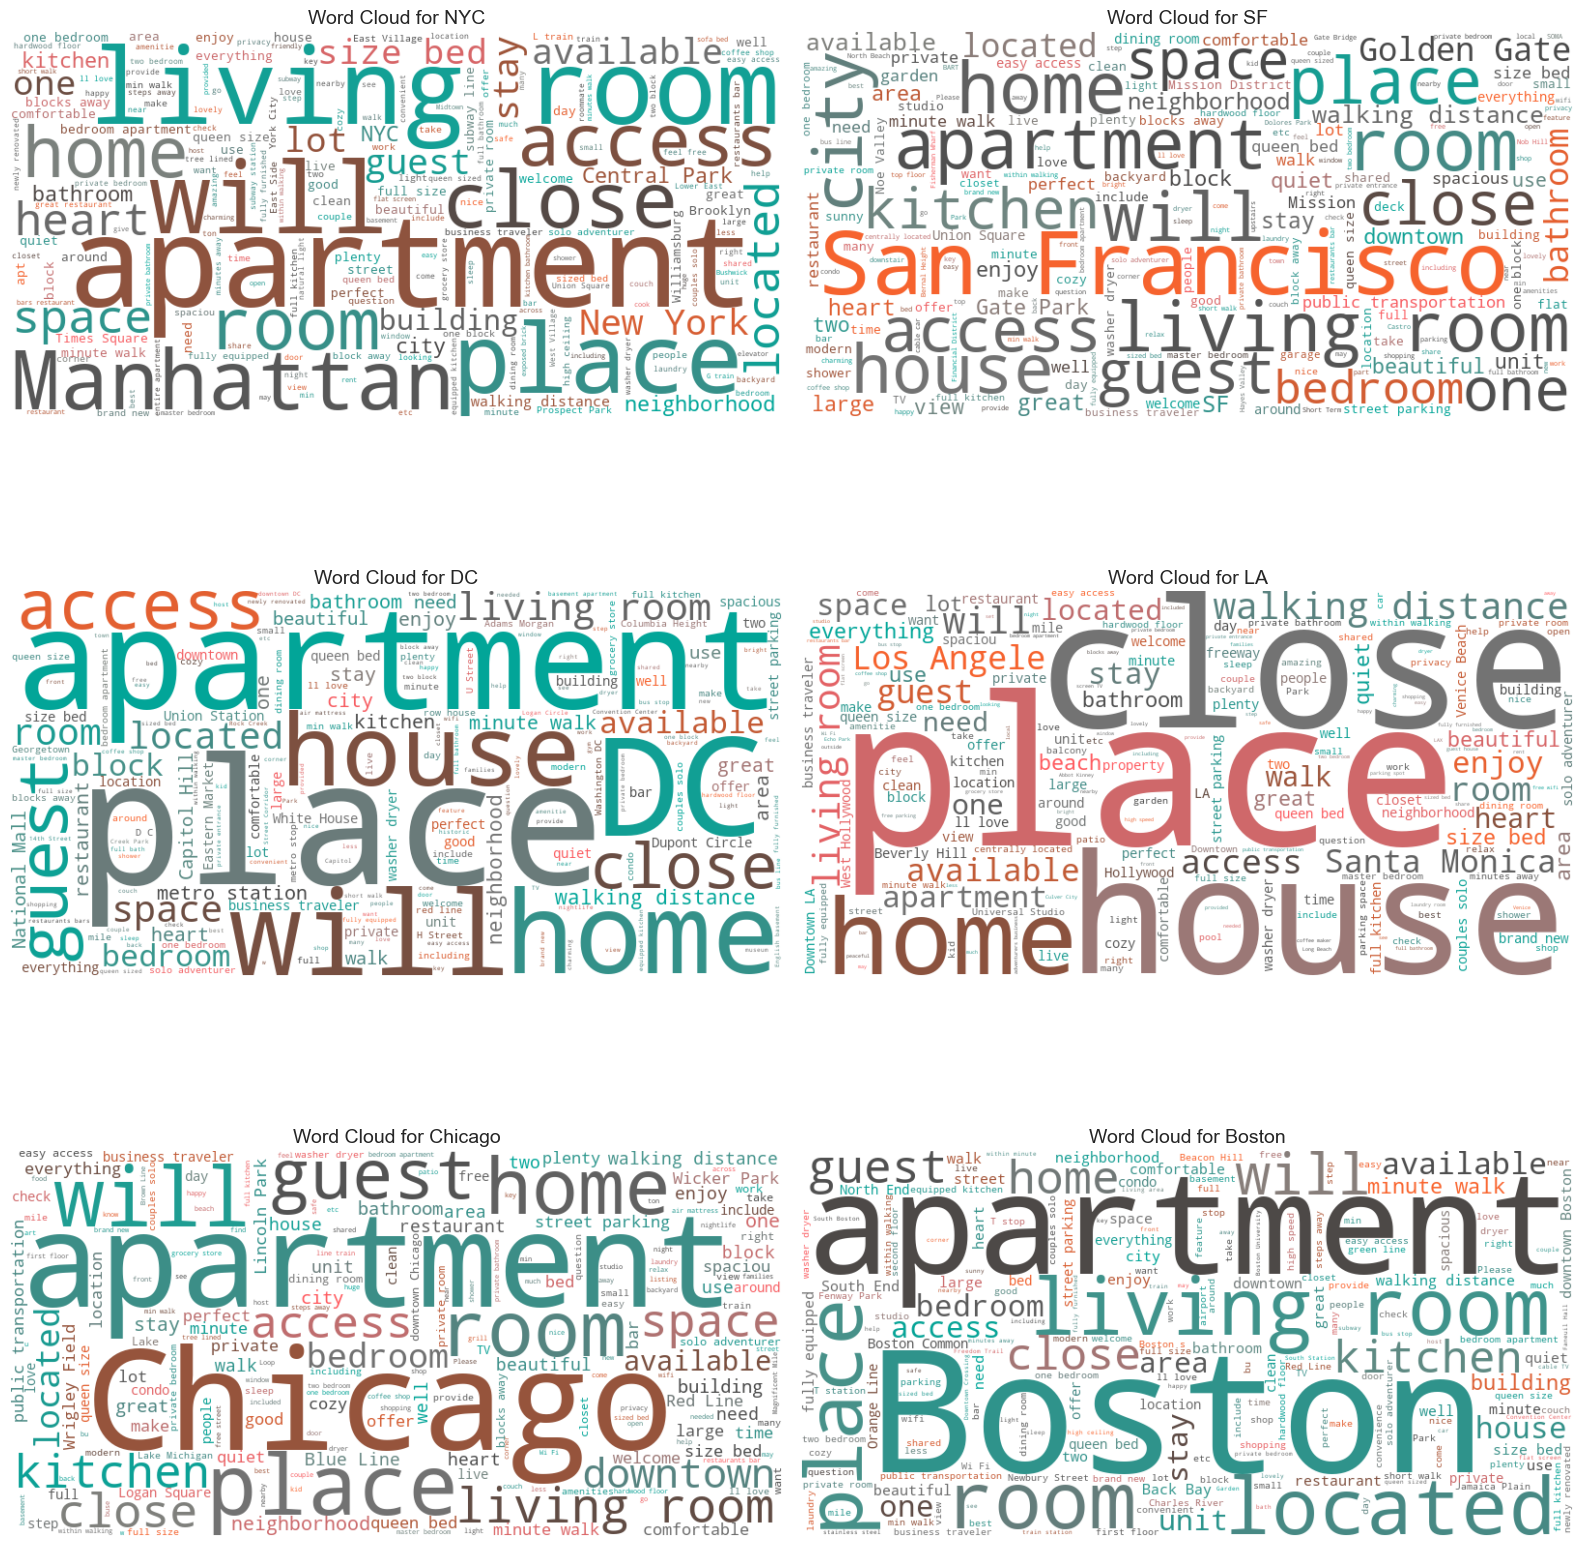

In [70]:
from wordcloud import WordCloud

cities = data['city'].unique()

fig, axes = plt.subplots(nrows=len(cities)//2 + len(cities)%2, ncols=2, figsize=(16, len(cities) * 3))

axes = axes.flatten()

for i, city in enumerate(cities):
    city_data = data[data['city'] == city]
    city_text = " ".join(city_data['description'].astype(str).values) 
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=cmap).generate(city_text)
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f"Word Cloud for {city}", fontsize=14)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We can observe that each city focuses on specific aspects in its Airbnb rental descriptions, reflecting what hosts think will attract short-term renters.

In New York City (NYC), terms like ‘apartment,’ ‘Manhattan,’ and ‘close’ stand out. This suggests that proximity to key areas like Manhattan is a major selling point for hosts, as many guests are likely seeking convenient access to the city’s core. Words like ‘living room’ and ‘place’ further emphasize the importance of comfort and spaciousness, crucial for guests looking for relaxing stays.

For San Francisco (SF), ‘close,’ ‘space,’ and ‘guest’ are common terms, highlighting the importance of proximity to attractions and the availability of comfortable spaces for guests. The frequent mention of ‘apartment’ and ‘house’ suggests a range of property types being rented out, while ‘Golden Gate’ emphasizes the draw of being near iconic landmarks.

In Washington D.C. (DC), words like ‘apartment,’ ‘place,’ and ‘access’ are key, with ‘Capitol’ and ‘Metro’ indicating the importance of proximity to political landmarks and public transportation. This makes sense, as many visitors to D.C. may be tourists or professionals attending events near the Capitol.

In Los Angeles (LA), ‘house,’ ‘home,’ and ‘place’ are prominent, which speaks to the preference for private, spacious accommodations. The frequent mentions of ‘Hollywood’ and ‘Beach’ suggest that access to entertainment hubs and seaside locations are prime attractions for renters in LA.

In Chicago, terms like ‘apartment,’ ‘place,’ and ‘guest’ are central, with ‘downtown’ indicating that central locations are highly valued. Guests seem to prioritize accessibility to the heart of the city along with welcoming accommodations.

Lastly, in Boston, words like ‘apartment,’ ‘living,’ and ‘room’ dominate, pointing to practical features within rental properties. The presence of words like ‘Boston’ and ‘place’ underscores the importance of location, with a focus on offering functional and comfortable spaces.

Each city’s Word Cloud reveals specific priorities in attracting Airbnb guests. Whether it’s proximity to landmarks, spacious living arrangements, or access to entertainment, hosts are tailoring their descriptions to highlight what they believe will make their rental properties more appealing to short-term renters.

# Recomendation system

In [71]:
data['description']

0        Beautiful, sunlit brownstone 1-bedroom in the ...
1        Enjoy travelling during your stay in Manhattan...
2        The Oasis comes complete with a full backyard ...
3        This light-filled home-away-from-home is super...
4        Cool, cozy, and comfortable studio located in ...
                               ...                        
74064                            one room in bushwick apt 
74065    Located on the Pacific Coast Highway, this apa...
74066    A modern apartment located in East Williamsbur...
74067    Fully renovated, designer's studio located in ...
74068    You will stay-aboard the Island Trader at one ...
Name: description, Length: 74068, dtype: object

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
data['description'].head()

0    Beautiful, sunlit brownstone 1-bedroom in the ...
1    Enjoy travelling during your stay in Manhattan...
2    The Oasis comes complete with a full backyard ...
3    This light-filled home-away-from-home is super...
4    Cool, cozy, and comfortable studio located in ...
Name: description, dtype: object

In [74]:
tfidf = TfidfVectorizer(stop_words = 'english',max_features=5000, min_df=5, max_df=0.8)
tfidf_matrix = tfidf.fit_transform(data['description'])

tfidf_matrix.shape

(74068, 5000)

In [75]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import h5py

with h5py.File('cosine_similarity.h5', 'w') as f:
    dset = f.create_dataset('cosine_sim', shape=(tfidf_matrix.shape[0], tfidf_matrix.shape[0]), dtype='float32')

    for i in range(0, tfidf_matrix.shape[0], 1000):
        cosine_sim_chunk = cosine_similarity(tfidf_matrix[i:i+1000], tfidf_matrix)
        dset[i:i+1000, :] = cosine_sim_chunk 


In [76]:
indices = pd.Series(data.index, index = data['name']).drop_duplicates()
indices

name
Beautiful brownstone 1-bedroom                    0
Superb 3BR Apt Located Near Times Square          1
The Garden Oasis                                  2
Beautiful Flat in the Heart of SF!                3
Great studio in midtown DC                        4
                                              ...  
one room bushwick                             74064
Spacious Hermosa 2 BR on PCH                  74065
Modern 2 Bedroom Apartment in Williamsburg    74066
Designer's Apartment in HEART of NYC          74067
Cozy Boat at Shoreline Village                74068
Length: 74068, dtype: int64

In [77]:
def get_recommendations(name, cosine_sim):
    idx = indices[name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = [(i, float(x[0]) if isinstance(x, (list, np.ndarray)) else float(x)) for i, x in sim_scores]
    
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:11]
    
    name_indices = [i[0] for i in sim_scores]
    return data['name'].iloc[name_indices]

with h5py.File('cosine_similarity.h5', 'r') as f:
    cosine_sim = f['cosine_sim'][:]

In [78]:
data[data['name']=='THE LIBRARY LOUNGE'].description.iloc[0]

'Cozy room in my big private house in Brooklyn. The room is smaller but guests have access to all of the common areas in the house. Its is great if your visiting the city and want some privacy and peacefulness in your New York travels. Check in time is flexible please contact me if you are interested in long term rental Guest have acces to the room and all the common areas including the back yard We can chat sometimes and i will tell you more about the neighborhood other than that you are on your own Jamaican / West Indian neighborhood amazing food, cool people, irie (URL HIDDEN) entire street is private houses. Train stop: Utica Avenue & Sutter Avenue - 8minute walk or 3 minute bus ride, the bus that drops you from the train station runs very often so it really is a quick ride to the manhattan. the bus stop is one block away.'

In [79]:
recommended_listings = get_recommendations('THE LIBRARY LOUNGE',cosine_sim )
recommended_listings

56697                                     SUNLIGHT SPECIAL
72725                 Spacious Brooklyn Room for Travelers
46787            Cozy Row Home Near NY Ave Metro/ H Street
73176                      Best price/location deal in NYC
66386                  Sunny Private Room in Crown Heights
50407                                  BACKPACKERS DELIGHT
24063                             Welcome to New York city
26782                            Fun Family in Los Angeles
15355                          Sunny Garden Facing Bedroom
37966    Astoria Duplex Bedroom, 25 minutes from the city!
Name: name, dtype: object

In [80]:
data[data['name']=='SUNLIGHT SPECIAL'].description.iloc[0]

'This sun filled room has a queen size bed, and a love seat. There is plenty of storage space, privacy and an awesome artsy vibe. There is even a space to set up a work desk if you need to. There is a bus stop 1 block away, Reach manhattan in 30 mins. The space is comfortable and quite, gets amazing sunlight in the daytime and has a huge queen size bed. It also has love seat. We have a backyard, full kitchen,full bathroom and a half bath downstairs. guest are free to enjoy them all. We can chat about things to do in the city and the neighborhood, but mostly you will be on your own to explore nyc. Jamaican / West Indian neighborhood amazing food, cool people, irie (URL HIDDEN) entire street is private houses. Train stop: Utica Avenue & Sutter Avenue - 8minute walk or 3 minute bus ride, the bus that drops you from the train station runs very often so it really is a quick ride to the manhattan. the bus stop is one block away.'

# Log Price Prediction

In [81]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [82]:
data_pred=data.copy()

In [83]:
drop_end=['description', 'host_has_profile_pic','amenities', 'host_identity_verified','latitude', 'longitude', 'name']
data_pred.drop(drop_end, axis=1, inplace=True)


In [95]:
data_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74068 entries, 0 to 74068
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   log_price             74068 non-null  float64
 1   property_type         74068 non-null  int64  
 2   room_type             74068 non-null  int64  
 3   accommodates          74068 non-null  int64  
 4   bathrooms             74068 non-null  float64
 5   bed_type              74068 non-null  int64  
 6   cancellation_policy   74068 non-null  int64  
 7   cleaning_fee          74068 non-null  bool   
 8   city                  74068 non-null  int64  
 9   instant_bookable      74068 non-null  bool   
 10  neighbourhood         74068 non-null  int64  
 11  number_of_reviews     74068 non-null  int64  
 12  review_scores_rating  74068 non-null  float64
 13  bedrooms              74068 non-null  float64
 14  beds                  74068 non-null  float64
 15  host_active_years     74

In [84]:
categorical_columns = data_pred.select_dtypes(include=['object']).columns

label_encoders = {}

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data_pred[column] = label_encoders[column].fit_transform(data_pred[column])

In [85]:
X = data_pred.drop('log_price', axis=1)
y = data_pred['log_price']

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)  

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((59254, 15), (14814, 15), (59254,), (14814,))

# DecisionTreeRegressor

In [99]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
regressor = DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_leaf=5)
regressor.fit(X_train, y_train)

pred_test= regressor.predict(X_test)
mse_test = mean_squared_error(y_test,pred_test)
r2_tree = r2_score(y_test,pred_test) 

tree_importances = regressor.feature_importances_



print("Feature importances from Decision Tree:", tree_importances)
print("MSE test: ", mse_test)
print("r2: ", r2_tree)

Feature importances from Decision Tree: [0.0127722  0.58511521 0.03183086 0.18464771 0.00079742 0.00304281
 0.0044314  0.06866446 0.00109073 0.03094559 0.02926446 0.0066978
 0.03153559 0.00248971 0.00667404]
MSE test:  0.21200162669869566
r2:  0.5834441944269175


In [100]:
feature_importances = pd.Series(tree_importances, index=data_pred.drop('log_price', axis=1).columns)
feature_importances.sort_values(ascending=False, inplace=True)

feature_importances

room_type               0.585115
bathrooms               0.184648
city                    0.068664
accommodates            0.031831
bedrooms                0.031536
neighbourhood           0.030946
number_of_reviews       0.029264
property_type           0.012772
review_scores_rating    0.006698
host_active_years       0.006674
cleaning_fee            0.004431
cancellation_policy     0.003043
beds                    0.002490
instant_bookable        0.001091
bed_type                0.000797
dtype: float64


# RandomForest

In [101]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=42,n_estimators=100)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)

mse_forest = mean_squared_error(y_test,forest_pred)
forest_r2 = r2_score(y_test, forest_pred)

print("MSE: ", mse_forest)
print("R²:", forest_r2)

MSE:  0.18528654229638197
R²: 0.635935883653315


# Catboost

In [91]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(iterations=600, learning_rate=0.1, depth=8, random_state=42, silent=True)
cat_model.fit(X_train, y_train)

y_pred_cat = cat_model.predict(X_test)
mse_cat = mean_squared_error(y_test, y_pred_cat)
r2_cat = r2_score(y_test, y_pred_cat)

print("MSE:", mse_cat)
print("R2:", r2_cat )

MSE: 0.15738962889667724
R2: 0.6907497141657204


# XgBoost

In [721]:
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
xgBoost_params = [{'max_depth': list(range(1, 10,1)), 'eta': list(np.arange(0.01,0.15,0.03)), 'n_estimators' : [10,25,50,100,350,500,1000]}]

xgbr = xgb.XGBRegressor()
gs = GridSearchCV(xgbr, xgBoost_params, cv = 3)
gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_score_)

{'eta': 0.06999999999999999, 'max_depth': 5, 'n_estimators': 1000}
0.6871537298975011


In [92]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42, n_estimators=1000, max_depth=5, eta=0.069)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test,xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
print("MSE: ", mse_xgb)
print("R²:", xgb_r2)


MSE:  0.1579446352483942
R²: 0.6896591983921494
